<a href="https://colab.research.google.com/github/binliu0630/Deep_Learning/blob/master/PyTorch1_2_and_TensorFlow2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch

In [1]:
## install torch
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 31kB/s 
     |████████████████████████████████| 8.8MB 152kB/s 
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: torchvision 0.3.0
    Uninstalling torchvision-0.3.0:
      Successfully uninstalled torchvision-0.3.0


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(torch.__version__)

1.2.0+cu92


In [0]:
# load the data

BATCH_SIZE = 32

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [0]:
# explore the data

def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  
  

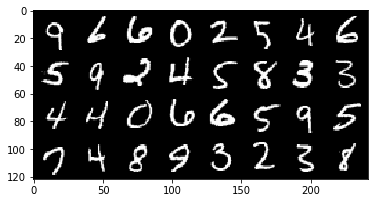

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [8]:
for images, labels in trainloader:
  print('Image batch dimention:', images.shape)
  print('Image label dimention:', labels.shape)
  break

Image batch dimention: torch.Size([32, 1, 28, 28])
Image label dimention: torch.Size([32])


In [0]:
# model

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.d1 = nn.Linear(28*28, 128)
    self.dropout = nn.Dropout(p=0.2)
    self.d2 = nn.Linear(128, 10)
    
    
  def forward(self, x):
    x = x.flatten(start_dim=1)
    x = self.d1(x)
    x = F.relu(x)
    x = self.dropout(x)
    logits = self.d2(x)
    out = F.softmax(logits, dim=1)
    return out

In [19]:
# test with 1 batch

model= MyModel()

for images, labels in trainloader:
  print('batch size:', images.shape)
  out = model(images)
  print(out.shape)
  break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [0]:
# train the model

learning_rate = 0.001
num_epochs = 3

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# model
model = MyModel()
model = model.to(device)
# loss function
criterion = nn.CrossEntropyLoss() 
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
def get_accuracy(output, target, batch_size):
  corrects = (torch.max(output,1)[1].view(target.size()).data == target.data).sum()
  accuracy = 100.0 * corrects/batch_size
  return accuracy.item()

In [34]:
for epoch in range(num_epochs):
  train_running_loss = 0.0
  train_acc = 0.0
  
  #set model in train mode
  model = model.train()
  
  for i, (images, labels) in enumerate(trainloader):
    images = images.to(device)
    labels = labels.to(labels)
    
    # forward
    predictions = model(images)
    # loss
    loss = criterion(predictions, labels)
    # backprop
    optimizer.zero_grad()
    loss.backward()
    # update params
    optimizer.step()
    
    # accumulate loss and acc batch by batch
    train_running_loss += loss.detach().item()
    train_acc += get_accuracy(predictions, labels, BATCH_SIZE)
  model.eval()
  print(f'Epoch: {epoch} | Loss: {train_running_loss/i: .4f} | Train Accuracy: {train_acc/i: .2f}%')

Epoch: 0 | Loss:  1.4864 | Train Accuracy:  97.34%
Epoch: 1 | Loss:  1.4848 | Train Accuracy:  97.48%
Epoch: 2 | Loss:  1.4837 | Train Accuracy:  97.59%


In [32]:
test_acc = 0.0 

for i, (images, labels) in enumerate(testloader):
  images = images.to(device)
  labels = labels.to(device)
  outputs = model(images)
  test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

print(f'Test Accuracy: {test_acc/i: .2f}% ')
  

Test Accuracy:  97.12% 


# Tensorflow

In [35]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [36]:
# load data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [37]:
# explore data

x_train.shape

(60000, 28, 28)

In [40]:
y_train.shape

(60000,)

In [0]:
# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# loss func, optimizer and matrics

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(x_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2938 - accuracy: 0.9140


In [45]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1427169425867498, 0.9584]